In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import cv2
import random

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Importing and loading data

In [3]:
# train

train_path = '/content/drive/MyDrive/general_assembly/hackathon/data/train'
categories = ['hotdog', 'nothotdog']
train_data = []
train_labels = []

In [5]:
for category in categories:
    category_directory = os.path.join(train_path, category)
    for image in os.listdir(category_directory):
        image_path = os.path.join(category_directory, image)
        img = cv2.imread(image_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        img = cv2.resize(img, (128, 128))
        train_data.append(img)
        train_labels.append(categories.index(category))

train_data = np.array(train_data)
train_labels = np.array(train_labels)

In [ ]:
# test

test_path = '/content/drive/MyDrive/general_assembly/hackathon/data/test'
categories = ['hotdog', 'nothotdog']
test_data = []
test_labels = []

In [ ]:
for category in categories:
    category_directory = os.path.join(test_path, category)
    for image in os.listdir(category_directory):
        image_path = os.path.join(category_directory, image)
        img = cv2.imread(image_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        img = cv2.resize(img, (128, 128))
        test_data.append(img)
        test_labels.append(categories.index(category))

test_data = np.array(test_data)
test_labels = np.array(test_labels)

In [8]:
# Saving the training and test data arrays

save_path = '/content/drive/MyDrive/general_assembly/hackathon/train_test_data_array'

np.save(os.path.join(save_path, 'train_data.npy'), train_data)
np.save(os.path.join(save_path, 'train_labels.npy'), train_labels)
np.save(os.path.join(save_path, 'test_data.npy'), test_data)
np.save(os.path.join(save_path, 'test_labels.npy'), test_labels)

In [3]:
train_data_path = '/content/drive/MyDrive/general_assembly/hackathon/train_test_data_array/train_data.npy'
train_labels_path = '/content/drive/MyDrive/general_assembly/hackathon/train_test_data_array/train_labels.npy'
test_data_path = '/content/drive/MyDrive/general_assembly/hackathon/train_test_data_array/test_data.npy'
test_labels_path = '/content/drive/MyDrive/general_assembly/hackathon/train_test_data_array/test_labels.npy'

train_data = np.load(train_data_path)
train_labels = np.load(train_labels_path)
test_data = np.load(test_data_path)
test_labels = np.load(test_labels_path)

In [15]:
train_data.shape

(3000, 128, 128, 3)

In [16]:
train_labels.shape

(3000,)

In [17]:
test_data.shape

(644, 128, 128, 3)

In [18]:
test_labels.shape

(644,)

## 0 - hotdog,  1 - nothotdog

0


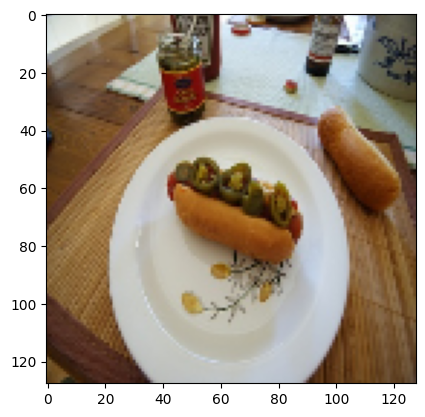

In [7]:
image_index = 221
plt.imshow(train_data[image_index])
print(train_labels[image_index]);

1


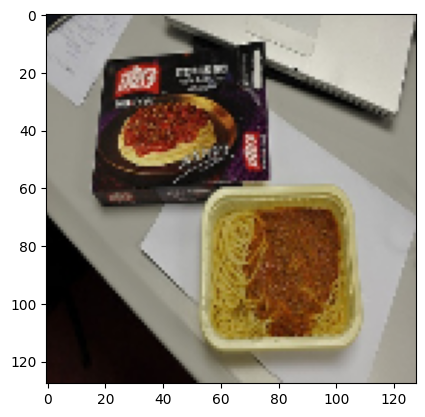

In [8]:
image_index = 2210
plt.imshow(train_data[image_index])
print(train_labels[image_index]);

In [23]:
def show_random_images(data, labels, categories, num_samples):
  '''
  Input: data, labels, categories, sample count, image name for saving.
  Output: Specified number of randomly selected images with class label.
  '''
  plt.figure(figsize=(12, 5))
  for i in range(num_samples):
    index1 = random.randint(0, len(data) - 1)
    plt.subplot(1, num_samples, i + 1)
    plt.imshow(data[index1])
    plt.title(categories[labels[index1]])
    plt.axis('off')
  plt.show()

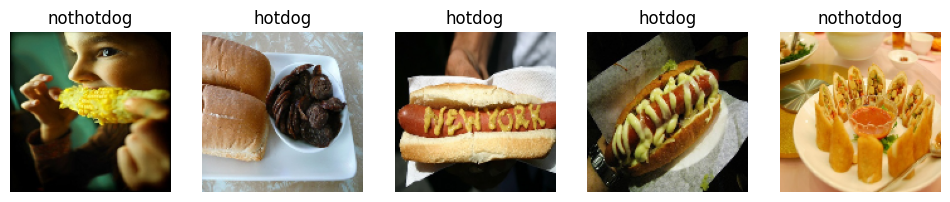

In [25]:
show_random_images(train_data, train_labels, categories, 5)

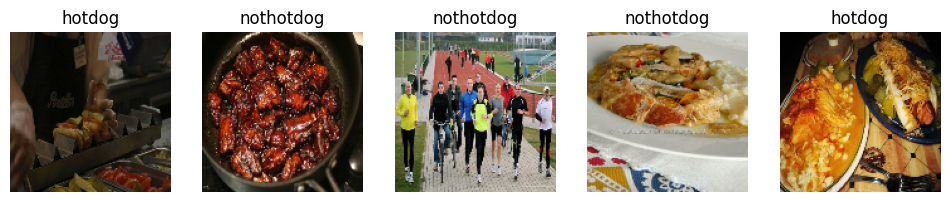

In [26]:
show_random_images(train_data, train_labels, categories, 5)

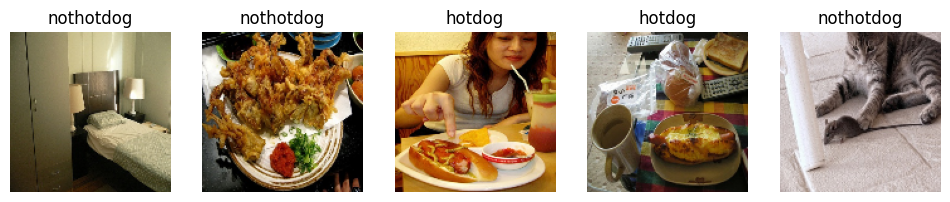

In [27]:
show_random_images(test_data, test_labels, categories, 5)

# label distribution / Baseline accuracy

In [29]:
# train

labels, counts = np.unique(train_labels, return_counts=True)

for label, count in zip(labels, counts):
  print(f'{label}: {count}')

print(f'hotdog: {counts[0]/len(train_labels)}')
print(f'nothotdog: {counts[1]/len(train_labels)}')

0: 1500
1: 1500
hotdog: 0.5
nothotdog: 0.5


In [30]:
# test

labels, counts = np.unique(test_labels, return_counts=True)

for label, count in zip(labels, counts):
  print(f'{label}: {count}')

print(f'hotdog: {counts[0]/len(test_labels)}')
print(f'nothotdog: {counts[1]/len(test_labels)}')

0: 322
1: 322
hotdog: 0.5
nothotdog: 0.5


# Modeling

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Conv2D, MaxPooling2D, Flatten, GlobalAveragePooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.regularizers import l2
from keras.models import load_model
from tensorflow.keras.applications import VGG16, ResNet50, Xception
from tensorflow.keras.optimizers import Adam, RMSprop
from tensorflow.keras.layers import BatchNormalization
from sklearn.metrics import classification_report, precision_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import roc_curve, auc, recall_score, f1_score

In [34]:
train_data.shape, train_labels.shape

((3000, 128, 128, 3), (3000,))

In [12]:
train_data = train_data / 255
test_data_norm = test_data / 255

In [13]:
X_train, X_val, y_train, y_val = train_test_split(train_data, train_labels, test_size=0.20, random_state=42)

In [5]:
# Switching to TPU & High-RAM. # saving and loading again

# save_path = '/content/drive/MyDrive/general_assembly/hackathon/train_test_data_array'

# np.save(os.path.join(save_path, 'X_train.npy'), X_train)
# np.save(os.path.join(save_path, 'X_val.npy'), X_val)
# np.save(os.path.join(save_path, 'y_train.npy'), y_train)
# np.save(os.path.join(save_path, 'y_val.npy'), y_val)
# np.save(os.path.join(save_path, 'test_data_norm.npy'), test_data_norm)

################

X_train_path = '/content/drive/MyDrive/general_assembly/hackathon/train_test_data_array/X_train.npy'
X_val_path = '/content/drive/MyDrive/general_assembly/hackathon/train_test_data_array/X_val.npy'
y_train_path = '/content/drive/MyDrive/general_assembly/hackathon/train_test_data_array/y_train.npy'
y_val_path = '/content/drive/MyDrive/general_assembly/hackathon/train_test_data_array/y_val.npy'

X_train = np.load(X_train_path)
X_val = np.load(X_val_path)
y_train = np.load(y_train_path)
y_val = np.load(y_val_path)

test_data_norm_path = '/content/drive/MyDrive/general_assembly/hackathon/train_test_data_array/test_data_norm.npy'
test_data_norm = np.load(test_data_norm_path)

In [6]:
X_train.shape, y_train.shape

((2400, 128, 128, 3), (2400,))

In [7]:
X_val.shape, y_val.shape

((600, 128, 128, 3), (600,))

## Model 1

In [18]:
model1 = Sequential()

model1.add(Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=X_train[0].shape))
model1.add(MaxPooling2D(2))

model1.add(Conv2D(64, 3, activation='relu'))
model1.add(MaxPooling2D(2))

model1.add(Flatten())

model1.add(Dense(1, activation='sigmoid'))

model1.compile(loss='binary_crossentropy', optimizer='adam', metrics=['acc'])

history1 = model1.fit(X_train, y_train,
                      validation_data = (X_val, y_val),
                      epochs = 10,
                      batch_size = 128)

Epoch 1/10
19/19 [==============================] - 6s 114ms/step - loss: 0.7716 - acc: 0.4900 - val_loss: 0.6839 - val_acc: 0.4783
Epoch 2/10
19/19 [==============================] - 1s 48ms/step - loss: 0.6559 - acc: 0.5942 - val_loss: 0.6383 - val_acc: 0.6300
Epoch 3/10
19/19 [==============================] - 1s 48ms/step - loss: 0.6018 - acc: 0.6817 - val_loss: 0.6022 - val_acc: 0.6850
Epoch 4/10
19/19 [==============================] - 1s 48ms/step - loss: 0.5686 - acc: 0.7075 - val_loss: 0.6065 - val_acc: 0.6633
Epoch 5/10
19/19 [==============================] - 1s 48ms/step - loss: 0.5445 - acc: 0.7271 - val_loss: 0.5779 - val_acc: 0.7017
Epoch 6/10
19/19 [==============================] - 1s 48ms/step - loss: 0.5134 - acc: 0.7458 - val_loss: 0.5925 - val_acc: 0.6817
Epoch 7/10
19/19 [==============================] - 1s 48ms/step - loss: 0.4931 - acc: 0.7571 - val_loss: 0.5861 - val_acc: 0.6983
Epoch 8/10
19/19 [==============================] - 1s 48ms/step - loss: 0.4539 - 

## Model 2

In [19]:
model2 = Sequential()

model2.add(Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=X_train[0].shape))
model2.add(MaxPooling2D(2))

model2.add(Conv2D(64, 3, activation='relu'))
model2.add(MaxPooling2D(2))

model2.add(Conv2D(128, 3, activation='relu'))
model2.add(MaxPooling2D(2))

model2.add(Conv2D(256, 3, activation='relu'))
model2.add(MaxPooling2D(2))

model2.add(Flatten())

model2.add(Dense(10, activation='relu'))
model2.add(Dense(1, activation='sigmoid'))

model2.compile(loss='binary_crossentropy', optimizer='adam', metrics=['acc'])

history2 = model2.fit(X_train, y_train,
                      validation_data = (X_val, y_val),
                      epochs = 30,
                      batch_size = 256)

Epoch 1/30
10/10 [==============================] - 7s 217ms/step - loss: 0.6876 - acc: 0.5504 - val_loss: 0.6571 - val_acc: 0.6367
Epoch 2/30
10/10 [==============================] - 1s 117ms/step - loss: 0.6358 - acc: 0.6421 - val_loss: 0.6330 - val_acc: 0.6467
Epoch 3/30
10/10 [==============================] - 1s 117ms/step - loss: 0.6188 - acc: 0.6696 - val_loss: 0.6404 - val_acc: 0.6400
Epoch 4/30
10/10 [==============================] - 1s 116ms/step - loss: 0.6061 - acc: 0.6817 - val_loss: 0.6264 - val_acc: 0.6533
Epoch 5/30
10/10 [==============================] - 1s 117ms/step - loss: 0.5956 - acc: 0.6825 - val_loss: 0.6157 - val_acc: 0.6850
Epoch 6/30
10/10 [==============================] - 1s 116ms/step - loss: 0.5783 - acc: 0.6983 - val_loss: 0.5813 - val_acc: 0.7083
Epoch 7/30
10/10 [==============================] - 1s 117ms/step - loss: 0.5590 - acc: 0.7104 - val_loss: 0.5775 - val_acc: 0.6900
Epoch 8/30
10/10 [==============================] - 1s 116ms/step - loss: 0.

## VGG16

In [20]:
train_datagen = ImageDataGenerator(
    rotation_range=45,       # Rotate the image by up to 45 degrees
    width_shift_range=0.15,  # Shift the image horizontally by up to 15% of the width
    height_shift_range=0.15, # Shift the image vertically by up to 15% of the height
    shear_range=0.1,         # Shear transformation (shear angle of 10 degrees.)
    zoom_range=0.2,          # Zoom in/out by up to 20%
    horizontal_flip=True,    # Allow random horizontal flip
    fill_mode='nearest'      # Fill in any pixels that might be lost during transformation
)

batch_size = 64

train_generator = train_datagen.flow(X_train, y_train, batch_size=batch_size)
val_generator = ImageDataGenerator().flow(X_val, y_val, batch_size=batch_size)

In [21]:
base_model = VGG16(input_shape=(128, 128, 3), include_top=False, weights='imagenet')

model3 = Sequential()
model3.add(base_model)
model3.add(Flatten())

model3.add(Dense(128, activation='relu'))
model3.add(BatchNormalization())
model3.add(Dropout(0.5))

model3.add(Dense(256, activation='relu'))
model3.add(BatchNormalization())
model3.add(Dropout(0.5))

model3.add(Dense(512, activation='relu'))
model3.add(BatchNormalization())
model3.add(Dropout(0.5))

model3.add(Dense(1, activation='sigmoid'))

model3.compile(optimizer=Adam(learning_rate=0.0001),
               loss='binary_crossentropy',
               metrics=['acc'])

es = EarlyStopping(monitor='val_loss', patience=5)

history3 = model3.fit(train_generator,
                      steps_per_epoch=len(X_train) // batch_size,
                      epochs=20,
                      validation_data=val_generator,
                      validation_steps=len(X_val) // batch_size,
                      callbacks = [es])

58889256/58889256 [==============================] - 2s 0us/step
Epoch 1/20
37/37 [==============================] - 32s 423ms/step - loss: 0.9854 - acc: 0.5081 - val_loss: 0.7014 - val_acc: 0.4722
Epoch 2/20
37/37 [==============================] - 11s 278ms/step - loss: 0.8936 - acc: 0.5492 - val_loss: 0.6957 - val_acc: 0.5469
Epoch 3/20
37/37 [==============================] - 11s 281ms/step - loss: 0.8356 - acc: 0.5775 - val_loss: 2.2528 - val_acc: 0.5243
Epoch 4/20
37/37 [==============================] - 11s 285ms/step - loss: 0.8039 - acc: 0.6152 - val_loss: 1.5562 - val_acc: 0.5208
Epoch 5/20
37/37 [==============================] - 11s 287ms/step - loss: 0.7451 - acc: 0.6455 - val_loss: 0.8941 - val_acc: 0.6094
Epoch 6/20
37/37 [==============================] - 11s 289ms/step - loss: 0.7068 - acc: 0.6614 - val_loss: 0.7818 - val_acc: 0.6285
Epoch 7/20
37/37 [==============================] - 11s 289ms/step - loss: 0.6809 - acc: 0.6729 - val_loss: 0.6098 - val_acc: 0.7222
Epoc

In [25]:
model3.save('/content/drive/MyDrive/general_assembly/hackathon/models/model3.h5')

## ResNet50
- Residual Network. ResNet architecture with 50 layers.v Pre-trained on the ImageNet dataset.
- GlobalAveragePooling2D (vs Flatten). Reduce the number of parameters and overfitting compared to flattening.
- ReduceLROnPlateau. Learning rate scheduler callback. Dynamically adjusts the learning rate during training based on the validation loss.

In [22]:
train_datagen = ImageDataGenerator(
    rotation_range=45,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Adjust batch size
batch_size = 32

train_generator = train_datagen.flow(X_train, y_train, batch_size=batch_size)
val_generator = ImageDataGenerator().flow(X_val, y_val, batch_size=batch_size)

In [24]:
base_model = ResNet50(input_shape=(128, 128, 3), include_top=False, weights='imagenet')

model4 = Sequential()
model4.add(base_model)
model4.add(GlobalAveragePooling2D())

model4.add(Dense(128, activation='relu'))
model4.add(BatchNormalization())
model4.add(Dropout(0.5))

model4.add(Dense(256, activation='relu'))
model4.add(BatchNormalization())
model4.add(Dropout(0.5))

model4.add(Dense(512, activation='relu'))
model4.add(BatchNormalization())
model4.add(Dropout(0.5))

model4.add(Dense(1, activation='sigmoid'))

optimizer = Adam(learning_rate=0.0001)
model4.compile(optimizer=optimizer,
              loss='binary_crossentropy',
              metrics=['acc'])

lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=3, verbose=1, min_lr=1e-6)

# Early stopping
es = EarlyStopping(monitor='val_loss', patience=10, verbose=1, restore_best_weights=True)

history4 = model4.fit(train_generator,
                    steps_per_epoch=len(X_train) // batch_size,
                    epochs=50,
                    validation_data=val_generator,
                    validation_steps=len(X_val) // batch_size,
                    callbacks=[lr_scheduler, es])

94765736/94765736 [==============================] - 4s 0us/step
Epoch 1/50
75/75 [==============================] - 52s 152ms/step - loss: 0.9232 - acc: 0.5592 - val_loss: 6.4660 - val_acc: 0.4809 - lr: 1.0000e-04
Epoch 2/50
75/75 [==============================] - 10s 135ms/step - loss: 0.6984 - acc: 0.6783 - val_loss: 13.2605 - val_acc: 0.4809 - lr: 1.0000e-04
Epoch 3/50
75/75 [==============================] - 10s 134ms/step - loss: 0.5309 - acc: 0.7613 - val_loss: 3.7655 - val_acc: 0.4774 - lr: 1.0000e-04
Epoch 4/50
75/75 [==============================] - 10s 135ms/step - loss: 0.4496 - acc: 0.8188 - val_loss: 1.7698 - val_acc: 0.4792 - lr: 1.0000e-04
Epoch 5/50
75/75 [==============================] - 10s 136ms/step - loss: 0.4001 - acc: 0.8313 - val_loss: 1.3305 - val_acc: 0.4757 - lr: 1.0000e-04
Epoch 6/50
75/75 [==============================] - 10s 134ms/step - loss: 0.3681 - acc: 0.8546 - val_loss: 1.4528 - val_acc: 0.4757 - lr: 1.0000e-04
Epoch 7/50
75/75 [================

In [34]:
history4.history['acc'][-1], history4.history['val_acc'][-1]

(0.9387500286102295, 0.890625)

In [28]:
model4.save('/content/drive/MyDrive/general_assembly/hackathon/models/model4.h5')

## Xception
- Extreme Inception

In [8]:
train_datagen = ImageDataGenerator(
    rotation_range=45,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

batch_size = 32

train_generator = train_datagen.flow(X_train, y_train, batch_size=batch_size)
val_generator = ImageDataGenerator().flow(X_val, y_val, batch_size=batch_size)

base_model = Xception(input_shape=(128, 128, 3), include_top=False, weights='imagenet')

model5 = Sequential()
model5.add(base_model)
model5.add(GlobalAveragePooling2D())

model5.add(Dense(128, activation='relu'))
model5.add(BatchNormalization())
model5.add(Dropout(0.5))

model5.add(Dense(256, activation='relu'))
model5.add(BatchNormalization())
model5.add(Dropout(0.5))

model5.add(Dense(512, activation='relu'))
model5.add(BatchNormalization())
model5.add(Dropout(0.5))

model5.add(Dense(1, activation='sigmoid'))

optimizer = Adam(learning_rate=0.0001)
model5.compile(optimizer=optimizer,
              loss='binary_crossentropy',
              metrics=['acc'])

lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=3, verbose=1, min_lr=1e-6)

es = EarlyStopping(monitor='val_loss', patience=10, verbose=1, restore_best_weights=True)

history5 = model5.fit(train_generator,
                    steps_per_epoch=len(X_train) // batch_size,
                    epochs=50,
                    validation_data=val_generator,
                    validation_steps=len(X_val) // batch_size,
                    callbacks=[lr_scheduler, es])

83683744/83683744 [==============================] - 3s 0us/step
Epoch 1/50
75/75 [==============================] - 48s 183ms/step - loss: 0.9519 - acc: 0.5288 - val_loss: 0.6052 - val_acc: 0.5729 - lr: 1.0000e-04
Epoch 2/50
75/75 [==============================] - 13s 170ms/step - loss: 0.7671 - acc: 0.6258 - val_loss: 0.5100 - val_acc: 0.7101 - lr: 1.0000e-04
Epoch 3/50
75/75 [==============================] - 13s 174ms/step - loss: 0.6519 - acc: 0.6846 - val_loss: 0.4605 - val_acc: 0.7986 - lr: 1.0000e-04
Epoch 4/50
75/75 [==============================] - 13s 178ms/step - loss: 0.6065 - acc: 0.7333 - val_loss: 0.3767 - val_acc: 0.8542 - lr: 1.0000e-04
Epoch 5/50
75/75 [==============================] - 14s 180ms/step - loss: 0.5283 - acc: 0.7713 - val_loss: 0.3333 - val_acc: 0.8663 - lr: 1.0000e-04
Epoch 6/50
75/75 [==============================] - 13s 179ms/step - loss: 0.4687 - acc: 0.8000 - val_loss: 0.3150 - val_acc: 0.8837 - lr: 1.0000e-04
Epoch 7/50
75/75 [=================

In [9]:
history5.history['acc'][-1], history5.history['val_acc'][-1]

(0.9191666841506958, 0.9114583134651184)

In [10]:
model5.save('/content/drive/MyDrive/general_assembly/hackathon/models/model5.h5')

# Evaluation (vs test data)

In [11]:
test_labels_path = '/content/drive/MyDrive/general_assembly/hackathon/train_test_data_array/test_labels.npy'
test_labels = np.load(test_labels_path)

In [12]:
test_data_norm.shape, test_labels.shape

((644, 128, 128, 3), (644,))

In [13]:
loss, accuracy = model5.evaluate(test_data_norm, test_labels, verbose=1)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

21/21 [==============================] - 1s 62ms/step - loss: 0.2293 - acc: 0.9084
Test Loss: 0.22934450209140778
Test Accuracy: 0.9083850979804993


In [16]:
preds = model5.predict(test_data_norm)

21/21 [==============================] - 2s 47ms/step


In [17]:
y_score = preds.ravel()
y_preds = np.where(y_score > 0.5, 1, 0)

In [21]:
y_preds

array([0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [18]:
labels, counts = np.unique(y_preds, return_counts=True)

for label, count in zip(labels, counts):
  print(f'{label}: {count}')

0: 307
1: 337


In [19]:
# Precision, Recall, f1
y_true = test_labels


class_names = ['hotdog', 'nothotdog']

print(classification_report(y_true, y_preds, target_names=class_names))

# individually:
precision = precision_score(y_true, y_preds)
recall = recall_score(y_true, y_preds)
f1 = f1_score(y_true, y_preds)

print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

              precision    recall  f1-score   support

      hotdog       0.93      0.89      0.91       322
   nothotdog       0.89      0.93      0.91       322

    accuracy                           0.91       644
   macro avg       0.91      0.91      0.91       644
weighted avg       0.91      0.91      0.91       644

Precision: 0.8902
Recall: 0.9317
F1 Score: 0.9105


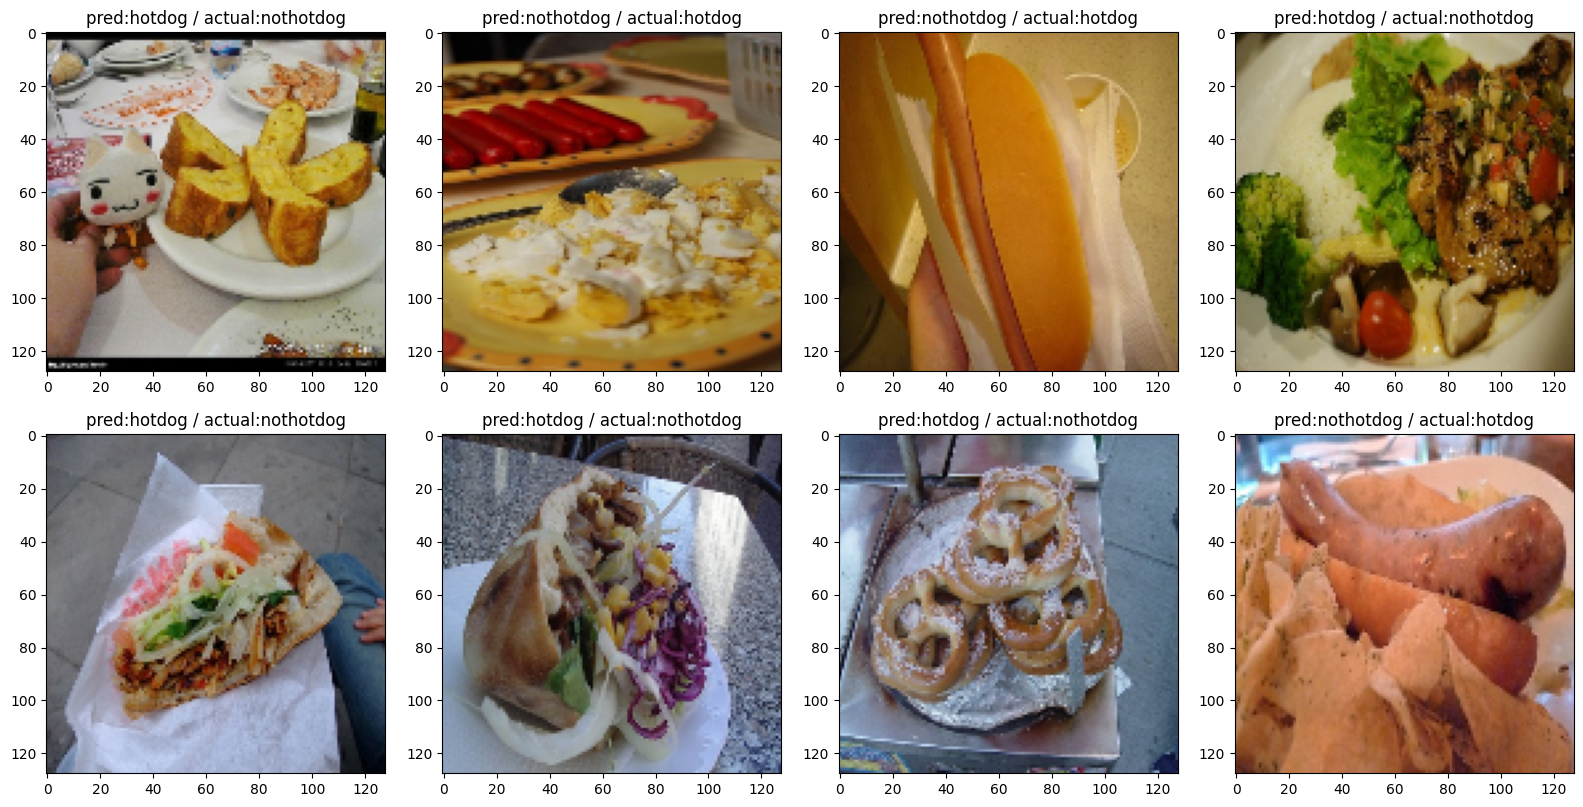

In [20]:
### reference: https://marcotcr.github.io/lime/tutorials/Tutorial%20-%20images.html
miss_indices = np.where(y_true != y_preds)[0]

# Randomly select 25 misclassified indices
random_miss_indices = np.random.choice(miss_indices, 8, replace=False)

miss_data = test_data_norm[random_miss_indices]
miss_true_labels = y_true[random_miss_indices]
miss_preds = y_preds[random_miss_indices]

# Visualize the 25 random misclassifications
plt.figure(figsize=(16, 16))
for i in range(8):
    plt.subplot(4,4, i + 1)
    plt.title('pred:{} / actual:{}'.format(class_names[miss_preds[i]], class_names[miss_true_labels[i]]))
    plt.imshow(miss_data[i])
plt.tight_layout()
plt.show()

In [35]:
def classify_image(image, model):
    new_image = []
    img = cv2.imread(image)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = cv2.resize(img, (128, 128))
    img_array = np.array(img)
    new_image.append(img)
    img_array_norm = np.array(new_image) / 255

    preds = model5.predict(img_array_norm)
    y_score = preds.ravel()
    y_preds = np.where(y_score > 0.5, 1, 0)

    if y_preds == 0:
        return "Hotdog"
    else:
        return "NotHotdog"

In [39]:
image = '/content/drive/MyDrive/general_assembly/hackathon/data/test/nothotdog/160.jpg'

print(classify_image(image, model5))

1/1 [==============================] - 0s 22ms/step
NotHotdog


In [40]:
image = '/content/drive/MyDrive/general_assembly/hackathon/data/test/hotdog/1520.jpg'

print(classify_image(image, model5))

1/1 [==============================] - 0s 28ms/step
Hotdog
